![image](JMUlogo.png)   

> # Math 248 Spring 2021
>                                                      
> # Computers and Numerical Algorithms                                                                                                     
> # Instructor: Hala Nelson
>
> # Week 6 Notes: Linear Algebra, Matrices, Singular Value Decomposition, and Applications
# Recall Matrix Multiplication
Let $A$ be a $3\times 3$ matrix:
$A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}$ and let $B$ be $3\times 2$ matrix $B =\begin{pmatrix}1 & 3  \\4 & -2  \\0 & 1\end{pmatrix}$, then AB is a $3\times 2$ matrix: $ AB= \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}$$\begin{pmatrix}1 & 3  \\4 & -2  \\0 & 1\end{pmatrix}$$= \begin{pmatrix}9 & 2  \\24 & 8  \\39 & 14 \end{pmatrix}$

In [25]:
# Define A and B as numpy arrays. Enter them one row at a time.
import numpy as np
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[1,3],[4,-2],[0,1]])

# We can visualize A and B as images
The value of an entry of the matrix corresponds to the intensity of the corresponding pixel. The higher the number the brighter the pixel. I will visualize A in color and B in greyscale.

Recall, $A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}$ and $B =\begin{pmatrix} 1 & 3\\4&-2\\0 & 1\end{pmatrix}$.

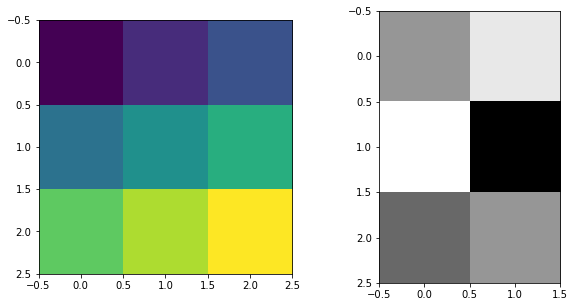

In [3]:
from matplotlib import pyplot as plt
# This is for controlling the color map since I want grey scale
import matplotlib.cm as cm
# split the figure into 2 subplots
fig, graph=plt.subplots(nrows = 1, ncols=2, figsize=(10,5))
graph[0].imshow(A)
graph[1].imshow(B, cmap=cm.Greys_r)

# Diagonal matrices are very special and desirable 

Multiplying by a diagonal matrix corresponds to stretching or squeezing of certain directions in space. Let's visualize a rectangular matrix with decreasing "diagonal" values on a greyscale.

$C = \begin{pmatrix}10 & 0 & 0&0\\0 & 6 & 0&0 \\0 & 0 & 3&0\\0&0&0&1\\0&0&0&0\end{pmatrix}$

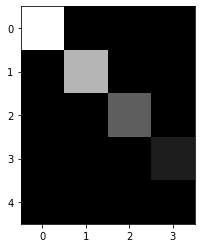

In [5]:
C=np.array([[10,0,0,0],[0,6,0,0],[0,0,3,0],[0,0,0,1],[0,0,0,0]])
plt.imshow(C, cmap=cm.Greys_r)

# Any matrix $A$ can be made equivalent to a diagonal matrix of similar shape to $A$ up to two rotations. This is accomplished using the Singular Value Decomposition of $A$ 
$$A=U\Sigma\ V^*$$
The singular value decomposition has far reaching applications in data analysis (principal component analsis), image processing, and natural language processing (latent symantic analysis). 
The singular value decomposition captures the action of any matrix on space itself. First it rotates it through the orthogonal matrix $V^*$, then stretches it or squeezes it in special directions through the diagonal matrix $\Sigma$, then rotates it again through the orthogonal matrix $U$. The rotations do not change space much, the stretching and squeezing encoded in the diagonal matrix $\Sigma$ are the most informative of the action of $A$. The diagonal entries of $\Sigma$ are called the singular values of $A$. 

# Let's use Python to find the Singular Value Decomposition of a square matrix
$$A = \begin{pmatrix}1 & 2 & 3 \\4 & 5 & 6 \\7 & 8 & 9\end{pmatrix}=U\Sigma\ V^*$$


U=
 [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
sigma=
 [1.68481034e+01 1.06836951e+00 3.33475287e-16]
Sigma=
 [[1.68481034e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.06836951e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.33475287e-16]]
Vt=
 [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]
product=
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


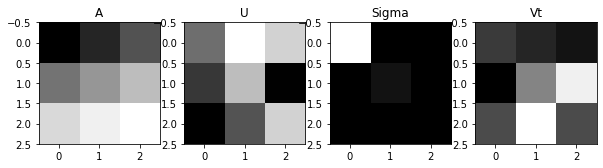

In [37]:
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.diag(sigma)
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's test if we got the right thing by multiplying U*sigma*transpose of V and recovering A
product=U.dot(Sigma.dot(Vt))
print("product=\n",product)

# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

# Let's work with a wide rectangular matrix
$$A= \begin{pmatrix}-1 & 3 & -5 & 4 & 18 \\1 & -2 & 4 & 0 & -7 \\2 & 0 & 4 & -3& -8\end{pmatrix}_{3\times5}=U_{3\times 3}\Sigma_{3\times 5} V^*_{5\times 5}$$

A=
 [[-1  3 -5  4 18]
 [ 1 -2  4  0 -7]
 [ 2  0  4 -3 -8]]
U=
 [[-0.84325482 -0.44137775 -0.30676862]
 [ 0.35017445 -0.01811286 -0.93650936]
 [ 0.40779794 -0.89713856  0.16983296]]
sigma=
 [22.90450542  2.63075845  2.54219223]
Sigma=
 [[22.90450542  0.          0.          0.          0.        ]
 [ 0.          2.63075845  0.          0.          0.        ]
 [ 0.          0.          2.54219223  0.          0.        ]]
Vt=
 [[ 0.0877131  -0.14102524  0.31645144 -0.20067725 -0.91214331]
 [-0.52114713 -0.48955751 -0.55273676  0.35195351 -0.24361837]
 [-0.1141042   0.37476036 -0.60296877 -0.68310072 -0.12781617]
 [ 0.18537095  0.66670183 -0.24456293  0.60750984 -0.30375492]
 [ 0.82056683 -0.39434588 -0.41347092  0.01275003 -0.00637501]]
product=
 [[-1.00000000e+00  3.00000000e+00 -5.00000000e+00  4.00000000e+00
   1.80000000e+01]
 [ 1.00000000e+00 -2.00000000e+00  4.00000000e+00  2.57367522e-16
  -7.00000000e+00]
 [ 2.00000000e+00 -6.56532547e-15  4.00000000e+00 -3.00000000e+00
  -8.000

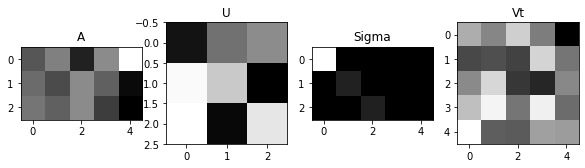

In [47]:
# Define A as a numpy array
A=np.array([[-1,3,-5,4,18],[1,-2,4,0,-7],[2,0,4,-3,-8]])
print("A=\n",A)
# Find the singular value decomposition of A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.zeros(A.shape) # Sigma has the same shape as A
m=np.amin(A.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's test if we got the right thing by multiplying U*sigma*transpose of V and recovering A
product=U.dot(Sigma.dot(Vt))
print("product=\n",product)

# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

# Let's work with a long rectangular matrix 
$$A=\begin{pmatrix}5&4\\4&0\\7&10\\-1&8\end{pmatrix}_{4\times2}=U_{4\times4}\Sigma_{4\times2}V^*_{2\times2}$$

A=
 [[ 5  4]
 [ 4  0]
 [ 7 10]
 [-1  8]]
U=
 [[ 0.39629242  0.34653384 -0.83964859 -0.13362956]
 [ 0.1352328   0.52912403  0.15106924  0.82396477]
 [ 0.80478595  0.13878907  0.48652003 -0.3104117 ]
 [ 0.42069464 -0.76202339 -0.18832575  0.4548294 ]]
sigma=
 [15.12602295  6.49641669]
Sigma=
 [[15.12602295  0.        ]
 [ 0.          6.49641669]
 [ 0.          0.        ]
 [ 0.          0.        ]]
Vt=
 [[ 0.51138362  0.85935254]
 [ 0.85935254 -0.51138362]]
product=
 [[ 5.00000000e+00  4.00000000e+00]
 [ 4.00000000e+00  5.21753947e-16]
 [ 7.00000000e+00  1.00000000e+01]
 [-1.00000000e+00  8.00000000e+00]]


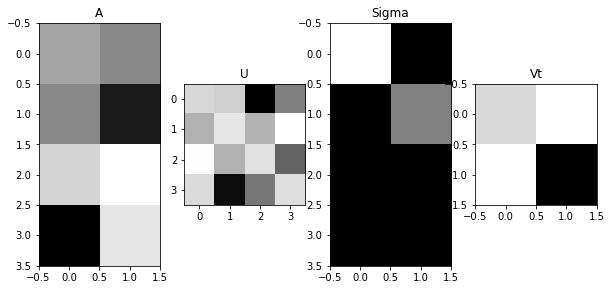

In [48]:
# Define A as a numpy array
A=np.array([[5,4],[4,0],[7,10],[-1,8]])
print("A=\n",A)
# Find the singular value decomposition of A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.zeros(A.shape) # Sigma has the same shape as A
m=np.amin(A.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's test if we got the right thing by multiplying U*sigma*transpose of V and recovering A
product=U.dot(Sigma.dot(Vt))
print("product=\n",product)

# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

# Let's apply Singular Value Decomposition to greyscale images
We will see how we can throw away insignificant singular values and retain most of the information in the image. This allows us to work with a lower rank matrix (hence a smaller problem size) while still keeping the essential information from the original larger size problem. We will work with this image:

![image](PictureOfUs.jpg)

Type of the image :  <class 'numpy.ndarray'>
Shape of the image : (763, 1256, 3)
Image Height 763
Image Width 1256
Dimension of Image 3


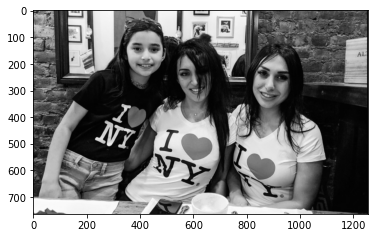

In [53]:
# Let's read the image file. It will be saved as 3 dimensional array, one layer for each channel.
picture = plt.imread("PictureOfUs.jpg")
# Let's see how python saves this image file
print('Type of the image : ' , type(picture))
print(f'Shape of the image : {picture.shape}')
print(f'Image Height {picture.shape[0]}')
print(f'Image Width {picture.shape[1]}')
print(f'Dimension of Image {picture.ndim}')
# Let's display the image
plt.imshow(picture)

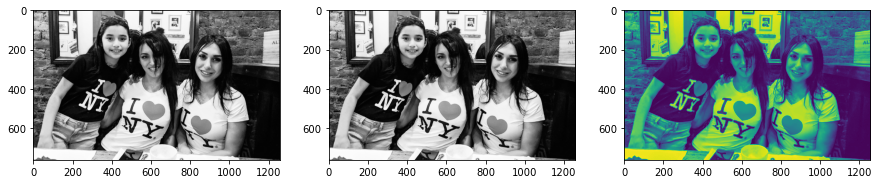

In [84]:
# Let's save each channel in its own two dimensional matrix
A=picture[:,:,0]
B=picture[:,:,1]
C=picture[:,:,2]
# Let's display these three channels. I will plot first two on grey scale and the third on color scale
fig, graph = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[1].imshow(B,cmap=cm.Greys_r)
graph[2].imshow(C)

> Note that since the image we started with is greyscale then all channels exhibit the same intensity, so the two dimensional matrix corresponding to each channel is the same.

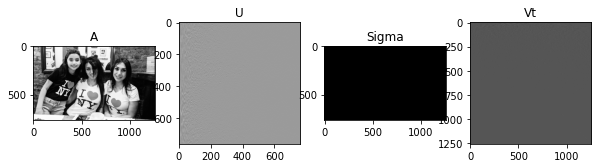

In [87]:
# Choose a channel and perform singular value decomposition. Do not print the matrices
# since they are very big, just show their image
# Find the singular value decomposition of A
U,sigma,Vt=np.linalg.svd(A)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.zeros(A.shape) # Sigma has the same shape as A
m=np.amin(A.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

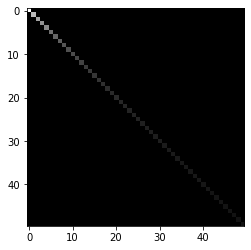

In [88]:
# Let's show only the first 50 diagonal entries of Sigma
plt.imshow(Sigma[1:51,1:51],cmap=cm.Greys_r)

# Now we will zero out smaller singular values and keep only the first 50.
Note that most of the information in the image will be retained while the size of the problem is significantly reduced (we originally had 763 nonzero singular values). The new matrix we will plot will be 
$$A=U\Sigma_{new}V^*$$
where we use the same $U$ and $V^*$ as before and the diagonal matrix $\Sigma_{new}$ has only the first $50$ singular values of the original $\Sigma$.

The original number of nonzero singular values is 763


Text(0.5, 1.0, 'Keep only 50 singular values')

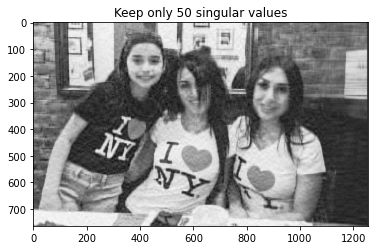

In [85]:
print(f"The original number of nonzero singular values is {len(sigma)}")
# Let's keep the first 50 singular values
reduced_sigma=sigma
reduced_sigma[51:len(sigma)+1]=0
# Let's redefine Sigma with the reduced number of singular values
Sigma=np.zeros(A.shape) # Sigma has the same shape as A
Sigma[0:m,0:m]=np.diag(reduced_sigma)
# Let's multiply U*Sigma*Vt and show its image
product=U.dot(Sigma.dot(Vt))
plt.imshow(product,cmap=cm.Greys_r)
plt.title("Keep only 50 singular values")

# Check out this image with different number of singular values retained. This is from somewhere on the internet.
![image](Fig_compression.jpeg)

# Let's study the effect of any matrix on space by studying its singular value decomposition. Let's work on a $2\times2$ matrix so we can easily visualize it.
$$A= \begin{pmatrix}-1 & 3 \\1 & -2\end{pmatrix}_{2\times2}=U_{2\times 2}\Sigma_{2\times 2} V^*_{2\times 2}$$

A=
 [[-1  3]
 [ 1 -2]]
U=
 [[-0.81741556  0.57604844]
 [ 0.57604844  0.81741556]]
sigma=
 [3.86432845 0.25877718]
Sigma=
 [[3.86432845 0.        ]
 [0.         0.25877718]]
Vt=
 [[ 0.36059668 -0.93272184]
 [ 0.93272184  0.36059668]]
product=
 [[-1.  3.]
 [ 1. -2.]]


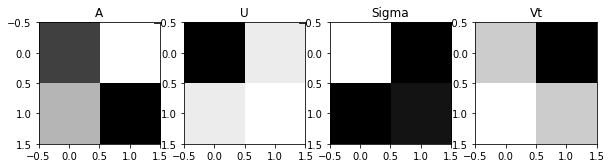

In [90]:
# Define A as a numpy array
A=np.array([[-1,3],[1,-2]])
print("A=\n",A)

# Find the singular value decomposition of A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.zeros(A.shape) # Sigma has the same shape as A
m=np.amin(A.shape) # pick the smaller number between the number of rows and columns 
Sigma[0:m,0:m]=np.diag(sigma) # place the singular values on the diagnal of Sigma
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Let's test if we got the right thing by multiplying U*sigma*transpose of V and recovering A
product=U.dot(Sigma.dot(Vt))
print("product=\n",product)

# Let's visualize the above product
# split the figure into 4 subplots
fig, graph=plt.subplots(nrows = 1, ncols=4, figsize=(10,5))
graph[0].imshow(A,cmap=cm.Greys_r)
graph[0].title.set_text('A')
graph[1].imshow(U,cmap=cm.Greys_r)
graph[1].title.set_text('U')
graph[2].imshow(Sigma,cmap=cm.Greys_r)
graph[2].title.set_text('Sigma')
graph[3].imshow(Vt,cmap=cm.Greys_r)
graph[3].title.set_text('Vt')

In [94]:
# Let e1 and e2 be the standard unit vectors
e1=np.array([[1],[0]])
e2=np.array([[0],[1]])
A.dot(e1)

array([[-1],
       [ 1]])